In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data_for_Values_1.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,20000,Yes


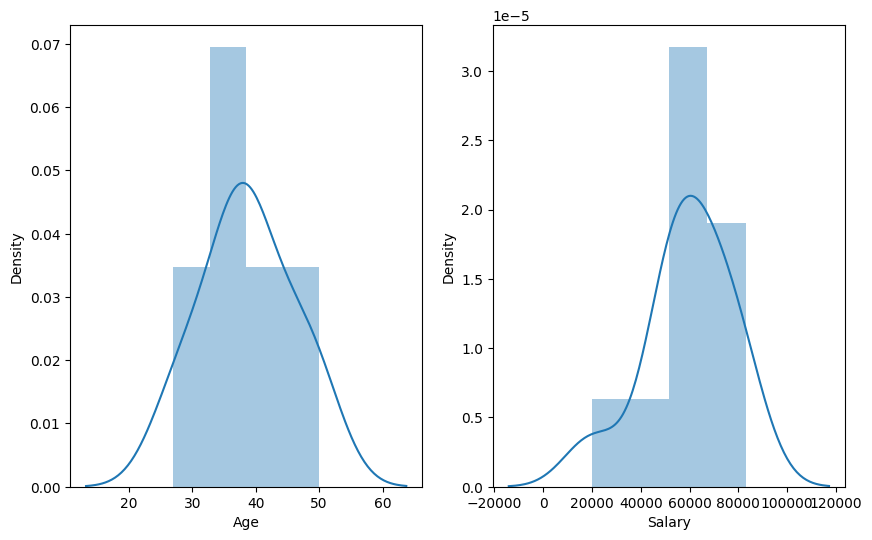

In [4]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.show()

In [ ]:
# Không phải là phân phối chuẩn -> không dùng StandarScaler

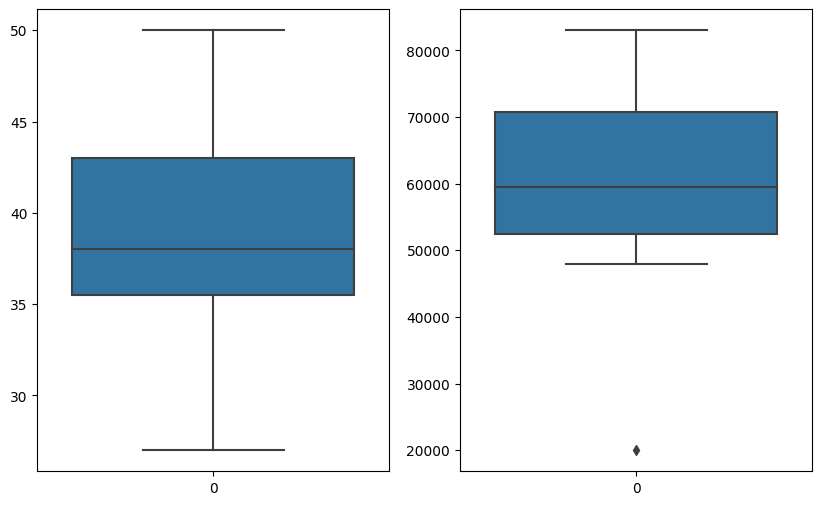

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Salary'])
plt.show()

In [ ]:
# Có outlier không thể dùng MinMaxScaler

In [7]:
df_new = df[['Age','Salary']]
df_new.head()

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,20000


In [9]:
# Dùng Robust Scaler
from sklearn.preprocessing import RobustScaler
# Khởi tạo
scale = RobustScaler()
df_scale = scale.fit_transform(df_new)
df_scale = pd.DataFrame(df_scale,columns=df_new.columns)
df_scale.head()

,Age,Salary
0,0.800000,0.684932
1,-1.466667,-0.630137
2,-1.066667,-0.301370
3,0.000000,0.082192
4,0.266667,-2.164384


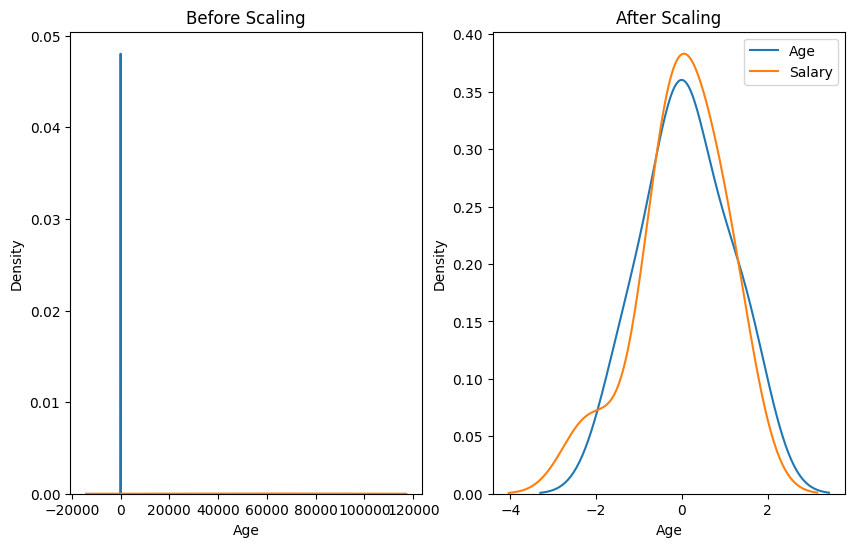

In [10]:
f, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(10,6))
sns.kdeplot(df_new['Age'],ax=ax1,label='Age')
sns.kdeplot(df_new['Salary'],ax=ax1,label='Salary')
ax1.set_title('Before Scaling')
sns.kdeplot(df_scale['Age'],ax=ax2,label='Age')
sns.kdeplot(df_scale['Salary'],ax=ax2,label='Salary')
ax2.set_title('After Scaling')
plt.legend()
plt.show()

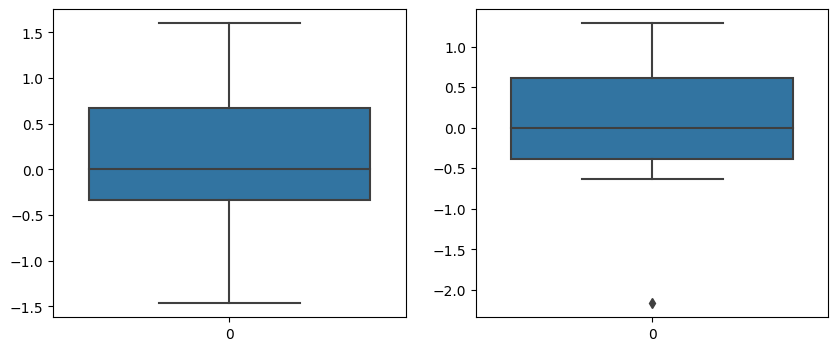

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df_scale['Age'])
plt.subplot(1,2,2)
sns.boxplot(df_scale['Salary'])
plt.show()

In [12]:
print('Before scaling:')
df_new.corr()

Before scaling:


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000


In [13]:
print('After scaling:')
df_scale.corr()

After scaling:


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000
